# PCA 예제

## 라이브러리 불러오기

In [2]:
## Import modules
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

## 데이터 불러오기
### BreastCancerWisconsin

In [3]:
data = pd.read_csv("BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


## X / Y로 데이터 분할 
### X에 해당하는 전체 변수 (31개) 중 10개만을 선택하여 사용


In [17]:
X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

## Train data를 기준으로 스케일링

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## PCA 모델 구축
### n_components는 만들어질 PCA의 축의 개수를 의미함

In [7]:
pca = PCA(n_components=None)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 구축된 PCA에 Train/Test set을 각각 적용 (축 변환)

In [9]:
Z = pca.transform(X)
print("- Shape of transformed data: ", Z.shape)

- Shape of transformed data:  (569, 10)


## PCA 각 축에 대한 설명력 확인
### num_components : Component의 개수 
### exp_var : 각 component에 대한 설명력
### cum_exp_var : 각 component의 설명력의 누적합

In [11]:
num_components = pca.n_components_
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

## 시각화를 통한 확인 (component별 설명력)

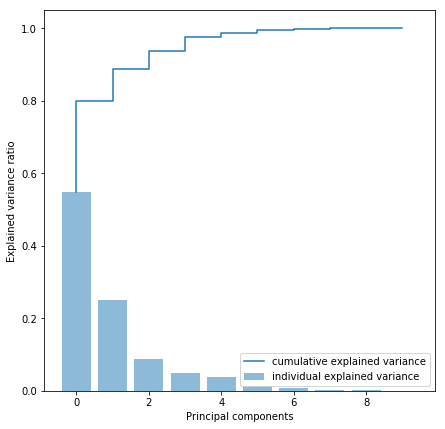

In [12]:
plt.figure(num=1, figsize=(7, 7))
plt.bar(range(num_components), exp_var, alpha=0.5, label='individual explained variance')
plt.step(range(num_components), cum_exp_var, label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

## Train data에 대한 scatter plot (2차원 / 3차원)
### 2차원 - PC1 / PC2

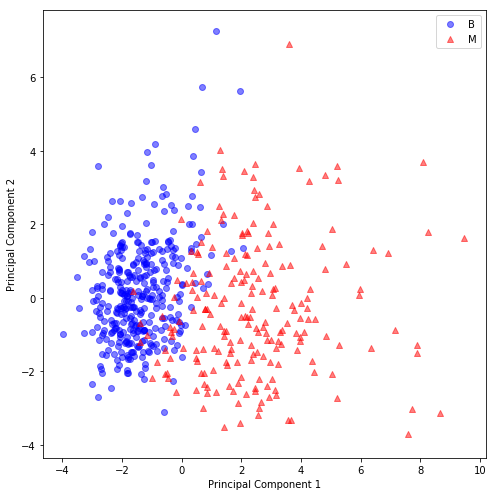

In [19]:
plt.figure(num=2, figsize=(7, 7))
for label, color, marker in zip(('B', 'M'), ('blue', 'red'), ('o', '^')):
    plt.scatter(Z[y == label, 0], Z[y == label, 1],
                label=label, color=color, marker=marker, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Train data에 대한 scatter plot (2차원 / 3차원)
### 3차원 - PC1 / PC2/ PC3

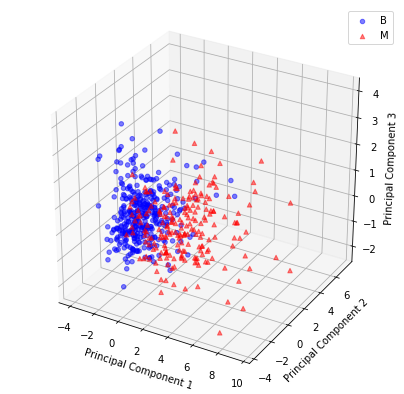

In [21]:
fig = plt.figure(num=3, figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for label, color, marker in zip(('B', 'M'), ('blue', 'red'), ('o', '^')):
    ax.scatter(Z[y == label, 0], Z[y == label, 1], Z[y == label, 2], label=label, color=color,
               marker=marker, alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='best')
plt.show(fig)